To Copilot:

look at this file, I will ask you to read two text files structured like this: fluxes-s000.txt and fluxes-tu01.txt. In both of them you can interpret the column which has for example "net_toa" in the first line (the 5th column disregarding | and ->) as the name of the variable. The next coulmn also is part of the name of the variable. So for example in the first line the variable name is "net_toa Global". Then in the next columns follow two numbers: the first one is the "new flux" and the second one is the "old flux". Read these two files, read the fluxes and the variable names and then make a plot using python as follows: make a scatter plot with the following points:

As X symbols: the scatter plot of old fluxes of s000 (vertical) vs the new fluxes of s000 (horizontal).
As full circles (superimposed on the previous plot): the scatter of old fluxes of tu01 (vertical) vs the new fluxes of s000 (horizontal). Draw also a small arrow joining each X point to the corresponding circle point.


In [1]:
2+2

4

In [2]:
a=2

In [7]:
import matplotlib.pyplot as plt

def read_fluxes(file_path):
    fluxes = {}
    with open(file_path, 'r') as file:
        for line in file:
            parts = line.split('|')

            if len(parts) < 3:
                break
            info = parts[2].strip().split()
 
            if len(info) < 4:
                continue
            variable_name = f"{info[2]} {info[3]}"
            new_flux = float(info[4])
            old_flux = float(info[5])
            fluxes[variable_name] = (new_flux, old_flux)
    return fluxes

# Read the fluxes from both files
fluxes_s000 = read_fluxes('fluxes-s000.txt')
fluxes_tu01 = read_fluxes('fluxes-tu01.txt')


In [9]:

# Prepare data for plotting
new_fluxes_s000 = []
old_fluxes_s000 = []
old_fluxes_tu01 = []

for var in fluxes_s000:
    new_flux_s000, old_flux_s000 = fluxes_s000[var]
    new_fluxes_s000.append(new_flux_s000)
    old_fluxes_s000.append(old_flux_s000)
    if var in fluxes_tu01:
        _, old_flux_tu01 = fluxes_tu01[var]
        old_fluxes_tu01.append(old_flux_tu01)
    else:
        old_fluxes_tu01.append(None)

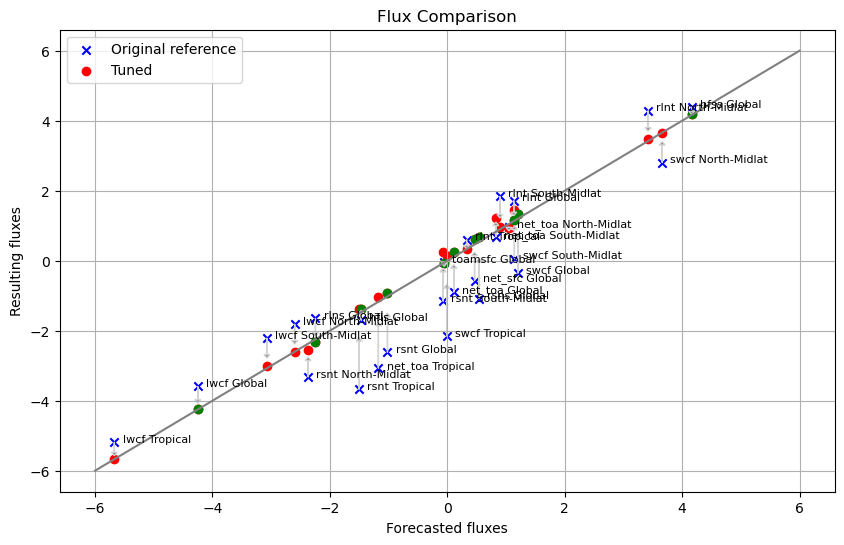

<Figure size 640x480 with 0 Axes>

In [29]:
# Plotting
plt.figure(figsize=(10, 6))

# Scatter plot for s000
plt.scatter(new_fluxes_s000, old_fluxes_s000, marker='x', color='blue', label='Original reference')

# Scatter plot for tu01
plt.scatter(new_fluxes_s000, old_fluxes_tu01, marker='o', color='red', label='Tuned')

# consider only variables which contain "Global" in their name and draw them in green
for i in range(len(new_fluxes_s000)):
    if 'Global' in list(fluxes_s000.keys())[i]:
        if old_fluxes_tu01[i] is not None:
            plt.scatter(new_fluxes_s000[i], old_fluxes_tu01[i], marker='o', color='green')

# Draw arrows
for i in range(len(new_fluxes_s000)):
    if old_fluxes_tu01[i] is not None:
        plt.arrow(new_fluxes_s000[i], old_fluxes_s000[i], 0, (old_fluxes_tu01[i] - old_fluxes_s000[i])*0.6, 
                  head_width=0.1, head_length=0.1, fc='gray', ec='lightgray')
        
# Draw a diagonal line between -6,-6 and +6,6
plt.plot([-6, 6], [-6, 6], color='gray')

# Add labels with variable name close to crosses
for i in range(len(new_fluxes_s000)):
    plt.text(new_fluxes_s000[i] + 0.14, old_fluxes_s000[i], list(fluxes_s000.keys())[i], fontsize=8)

plt.xlabel('Forecasted fluxes')
plt.ylabel('Resulting fluxes')
plt.legend()
plt.title('Flux Comparison')
plt.grid(True)
plt.show()

# Save the plot to a file
#plt.savefig('flux_comparison.png')
